In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"; # for GPU 1.

import pandas as pd
import matplotlib.pyplot as plt
from multiprocessing import  Pool
from functools import partial
import numpy as np
import pickle
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import AveragePooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling1D

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
f=open('dataTrain_2.pk', 'rb')
train_data = pickle.load(f)
f.close()
f=open('dataValid_2.pk', 'rb')
valid_data = pickle.load(f)
f.close()

In [3]:
train_data['newclassID'] = train_data['classID'].apply(lambda x: 1 if x == 6 else 0)
valid_data['newclassID'] = valid_data['classID'].apply(lambda x: 1 if x == 6 else 0)

In [4]:
train_data[0:20]

,slice_file_name,fsID,start,end,salience,fold,classID,class,resizeDenoise,newclassID
4578,18594-1-6-0.wav,18594,77.175828,77.611488,1,3,1,car_horn,"[0.016783179715275764, 0.016783179715275764, 0...",0
328,104998-7-16-5.wav,104998,424.655994,428.655994,1,5,7,jackhammer,"[0.015944810584187508, 0.015944810584187508, 0...",0
1077,124489-9-0-18.wav,124489,9.000000,13.000000,1,1,9,street_music,"[-0.03582550585269928, -0.03582550585269928, -...",0
1951,147491-9-2-10.wav,147491,96.062031,100.062031,2,10,9,street_music,"[0.10504018515348434, 0.10504018515348434, 0.1...",0
3475,171305-7-19-0.wav,171305,81.030035,82.575304,1,4,7,jackhammer,"[-0.004902764223515987, -0.004902764223515987,...",0
1243,130030-3-0-0.wav,130030,0.000000,2.594667,1,1,3,dog_bark,"[-0.006449826993048191, -0.006449826993048191,...",0
7360,69962-2-0-17.wav,69962,8.500000,12.500000,1,6,2,children_playing,"[0.005254121031612158, 0.005254121031612158, 0...",0
5798,24347-8-0-5.wav,24347,6.620371,10.620371,2,4,8,siren,"[-0.00024375718203373253, -0.00024375718203373...",0
3015,162728-1-0-0.wav,162728,2.778806,3.200719,1,7,1,car_horn,"[0.1394062340259552, 0.1394062340259552, 0.139...",0
2931,162134-7-15-2.wav,162134,262.597486,266.597486,1,10,7,jackhammer,"[-0.04251440614461899, -0.04251440614461899, -...",0


In [5]:
X_train_d= np.array([x for x in train_data['resizeDenoise'].values])
X_valid_d= np.array([x for x in valid_data['resizeDenoise'].values])

In [6]:
Y_train_d= train_data['newclassID']
Y_valid_d= valid_data['newclassID']

In [7]:
Y_train_d[0:20]
X_train_d[0:20]

array([[ 0.01678318,  0.01678318,  0.01678318, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01594481,  0.01594481,  0.01594481, ...,  0.        ,
         0.        ,  0.        ],
       [-0.03582551, -0.03582551, -0.03582551, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.01898909,  0.01898909,  0.01898909, ...,  0.        ,
         0.        ,  0.        ],
       [-0.02260555, -0.02260555, -0.02260555, ...,  0.        ,
         0.        ,  0.        ],
       [-0.01737948, -0.01737948, -0.01737948, ...,  0.        ,
         0.        ,  0.        ]])

In [8]:
train_data = None
valid_data = None

In [9]:
numCols = X_train_d.shape[1]
print(numCols)

89009


In [15]:
def createModel():
    model = Sequential()
    model.add(Conv1D(32, 3, activation='relu', input_shape = (numCols,1)))

    model.add(MaxPooling1D(pool_size= 2))
    model.add(Dropout(0.2))

    model.add(Conv1D(128, 2,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(256, 2,activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))

    model.add(Conv1D(256, 2,activation='relu'))
#     model.add(Activation('relu'))
#     model.add(MaxPooling1D(pool_size= 2))
#     model.add(Dropout(0.25))
    
#     model.add(Conv1D(512,2, activation='relu'))
#     model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model

In [16]:
model = createModel()
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

# Display model architecture summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 89007, 32)         128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 44503, 32)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 44503, 32)         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 44502, 128)        8320      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 22251, 128)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 22251, 128)        0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 22250, 256)       

In [17]:
from tensorflow.keras.utils import to_categorical

X_train_r = X_train_d.reshape(X_train_d.shape[0], numCols, 1)
X_valid_r = X_valid_d.reshape(X_valid_d.shape[0], numCols, 1)

In [18]:
Y_train_r = to_categorical(Y_train_d)
Y_valid_r = to_categorical(Y_valid_d)

In [19]:
history = model.fit(X_train_r,
                      Y_train_r,
                      validation_data = (X_valid_r, 
                      Y_valid_r),
                      batch_size=20,
                      epochs=40)

Train on 6286 samples, validate on 1572 samples
Epoch 1/40
6286/6286 [==============================] - 113s 18ms/sample - loss: 0.1501 - acc: 0.9604 - val_loss: 0.1414 - val_acc: 0.9555
Epoch 2/40
6286/6286 [==============================] - 113s 18ms/sample - loss: 0.1116 - acc: 0.9677 - val_loss: 0.1161 - val_acc: 0.9612
Epoch 3/40
6286/6286 [==============================] - 113s 18ms/sample - loss: 0.0994 - acc: 0.9726 - val_loss: 0.1473 - val_acc: 0.9567
Epoch 4/40
6286/6286 [==============================] - 113s 18ms/sample - loss: 0.0929 - acc: 0.9722 - val_loss: 0.1139 - val_acc: 0.9650
Epoch 5/40
6286/6286 [==============================] - 113s 18ms/sample - loss: 0.0900 - acc: 0.9726 - val_loss: 0.1256 - val_acc: 0.9631
Epoch 6/40
6286/6286 [==============================] - 113s 18ms/sample - loss: 0.0886 - acc: 0.9753 - val_loss: 0.1163 - val_acc: 0.9656
Epoch 7/40
6286/6286 [==============================] - 113s 18ms/sample - loss: 0.0844 - acc: 0.9745 - val_loss: 0.10

In [20]:
f=open('dataTest_2.pk', 'rb')
test_data = pickle.load(f)
f.close()

In [21]:
test_data['newclassID'] = test_data['classID'].apply(lambda x: 1 if x == 6 else 0)
X_test = test_data['resizeDenoise'].values
Y_test = test_data['newclassID']

In [22]:
X_test_d= np.array([x for x in X_test])
X_test_r = X_test_d.reshape(X_test_d.shape[0], numCols, 1)

In [23]:
pred = model.predict(X_test_r)

In [24]:
label_names = ['normal', 'gun_shot']

In [25]:
import sklearn.metrics as metrics
predout = np.argmax(pred, axis=1)
testout = Y_test
print("Test result: ")

testScores = metrics.accuracy_score(testout, predout)
confusion = metrics.confusion_matrix(testout, predout)
print("Best accuracy (on test data set): %.2f%%" % (testScores * 100))
print(metrics.classification_report(testout, predout, labels=[0,1],target_names=label_names, digits=4))
print(confusion)

Test result: 
Best accuracy (on test data set): 97.14%
              precision    recall  f1-score   support

      normal     0.9800    0.9905    0.9852       840
    gun_shot     0.6800    0.5000    0.5763        34

    accuracy                         0.9714       874
   macro avg     0.8300    0.7452    0.7807       874
weighted avg     0.9683    0.9714    0.9693       874

[[832   8]
 [ 17  17]]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


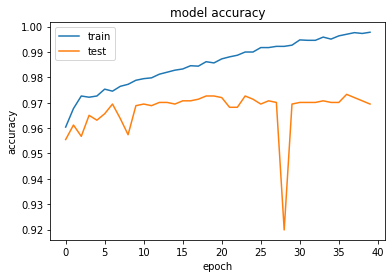

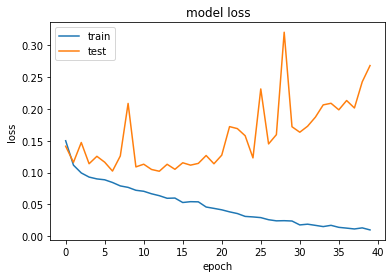

In [26]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
X_train = None
Y_train = None
X_train_d = None
Y_train_d = None
X_train_r = None
Y_train_r = None
X_valid = None
Y_valid = None
X_valid_d = None
Y_valid_d = None
X_valid_r = None
Y_valid_r = None